In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import tensorflow as tf
import os

from utils.config import get_gpu_memory
from utils.config import get_callbacks
from data_process.load_data import get_generators
from models.train import train_model
from models.model import get_strategy
from models.model import create_mobilenetv2_model
from utils.visualize import plot_training
from utils.visualize import plot_confusion_matrix
from utils.visualize import plot_roc_curve
from utils.evaluate import evaluate_model
from utils.evaluate import calculate_metrics

In [ ]:
# Verifica se há GPU disponível
get_gpu_memory()

# Configurações
IMG_SIZE = (224, 224)  # Tamanho da imagem
BATCH_SIZE = 64
EPOCHS = 100  # Número de épocas
NUM_CLASSES = 2  # Número de classes
PACIENTE = 3  # Paciência para o EarlyStopping
DELTA = 0.001  # Delta para o ReduceLROnPlateau

# Caminhos para os dados
PATH_IMGS = r'C:\Users\Fernando Alves\Desktop\ComputerVision\Datasets\Dataset-splited'
LOG_DIR = "logs"





WEIGHT_PATH = "weights/"
if not os.path.exists(WEIGHT_PATH):
    os.makedirs(WEIGHT_PATH)


CHECKPOINT_PATH = "weights/checkpoint/"
if not os.path.exists(CHECKPOINT_PATH):
    os.makedirs(CHECKPOINT_PATH)


MODEL_PATH = "models/"
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

# Configurações de avaliação
EVAL_BATCH_SIZE = 32
EVAL_PATH = "dataset-224x224-10x-macenko_splited/test/"
if not os.path.exists(EVAL_PATH):
    os.makedirs(EVAL_PATH)

# Configurações de teste
TEST_BATCH_SIZE = 32
TEST_PATH = "dataset-224x224-10x-macenko_splited/test/"
if not os.path.exists(TEST_PATH):
    os.makedirs(TEST_PATH)

# Configurações de predição
PRED_BATCH_SIZE = 32
PRED_PATH = "dataset-224x224-10x-macenko_splited/test/"
if not os.path.exists(PRED_PATH):
    os.makedirs(PRED_PATH)

# Configurações de visualização
VISUALIZE_BATCH_SIZE = 32
VISUALIZE_PATH = "dataset-224x224-10x-macenko_splited/test/"
if not os.path.exists(VISUALIZE_PATH):
    os.makedirs(VISUALIZE_PATH)


No GPU found, using CPU.


In [15]:
train_generator, validation_generator, test_generator = get_generators(PATH_IMGS, IMG_SIZE, BATCH_SIZE)

Found 71733 images belonging to 2 classes.
Found 18915 images belonging to 2 classes.
Found 11855 images belonging to 2 classes.


In [16]:
# Criar modelo DenseNet dentro da estratégia
strategy = get_strategy()
with strategy.scope():
    # Criando e compilando o modelo
    model = create_mobilenetv2_model(pretrained=True, num_classes=NUM_CLASSES)
    model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Treinando com CPU


In [17]:
# Callbacks
early_stopping, checkpoint, tensorboard_callback = get_callbacks(CHECKPOINT_PATH, DELTA, PACIENTE, log_dir)

In [18]:
# Treinamento
history = train_model(
                        model, 
                        MODEL_PATH, 
                        WEIGHT_PATH, 
                        BATCH_SIZE, 
                        EPOCHS, 
                        early_stopping, 
                        checkpoint, 
                        tensorboard_callback, 
                        train_generator, 
                        validation_generator
                    )

c:\Users\Fernando Alves\anaconda3\envs\tensorflow\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100
  42/1120 ━━━━━━━━━━━━━━━━━━━━ 54:53 3s/step - accuracy: 0.7420 - loss: 0.6097

KeyboardInterrupt: 

In [ ]:
# Plotar evolução do treinamento
plot_training(history)

# Exibir instruções para visualizar o TensorBoard
print("\nPara visualizar o treinamento em tempo real, execute no terminal:")
print("tensorboard --logdir=logs/fit/mobileNetv2")
print("Depois, abra no navegador: http://localhost:6006")


## **Avaliando o Modelo**

In [ ]:
# Caminho do modelo salvo
model_path = "mobileNetv2_model_224x224.keras"

# Carregar modelo
model = load_model(model_path, compile=False)
class_indices = test_generator.class_indices  # Índices das classes
class_labels = list(class_indices.keys())  # Nomes das classes

# Avaliação no conjunto de teste
y_true = test_generator.classes  # Classes verdadeiras
y_pred_probs = model.predict(test_generator)  # Probabilidades preditas
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes preditas

# Calcular métricas
calculate_metrics(y_true, y_pred, class_labels)

# Plotar matriz de confusão
plot_confusion_matrix(y_true, y_pred, class_labels)


2025-02-10 14:05:39.954220: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


475/475 [==============================] - 67s 80ms/step
Classification Report:
              precision    recall  f1-score   support

         CIN       0.69      0.92      0.79     10015
         MSI       0.57      0.20      0.30      5162

    accuracy                           0.68     15177
   macro avg       0.63      0.56      0.55     15177
weighted avg       0.65      0.68      0.62     15177

Accuracy: 0.6777
Precision: 0.6519
Recall: 0.6777
F1-Score: 0.6237


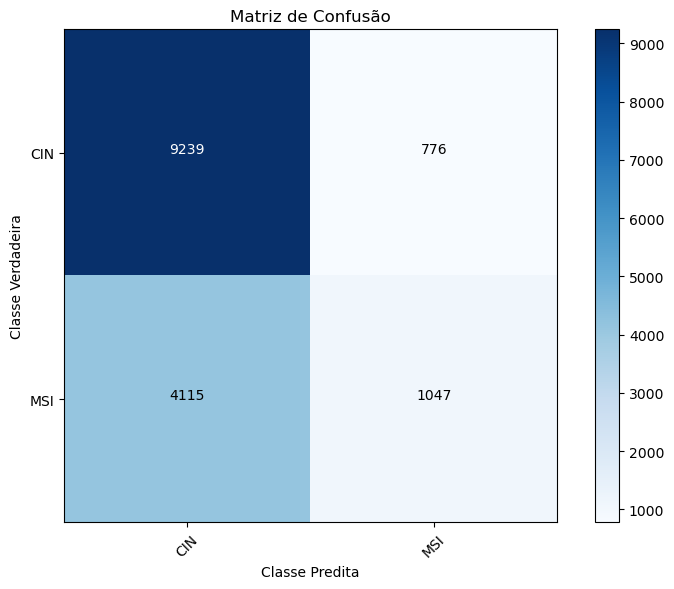

In [6]:
# Caminho do modelo salvo
model_path = "mobileNetv2_model_224x224.keras"

# Carregar modelo
model = load_model(model_path)
class_indices = test_generator.class_indices  # Índices das classes
class_labels = list(class_indices.keys())  # Nomes das classes

# Avaliação no conjunto de teste
y_true = test_generator.classes  # Classes verdadeiras
y_pred_probs = model.predict(test_generator)  # Probabilidades preditas
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes preditas

# Calcular métricas
calculate_metrics(y_true, y_pred, class_labels)

# Plotar matriz de confusão
plot_confusion_matrix(y_true, y_pred, class_labels)


# Treinamento com mais épocas

In [ ]:
# carregar o modelo salvo
model = tf.keras.models.load_model('mobileNetv2_model_224x224.keras')

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=20,         # Novo valor de paciência
    min_delta=0.001,
    restore_best_weights=True,
    verbose=1
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    save_weights_only=True,
    save_best_only=True,
    monitor='val_loss',
    verbose=1
)

# Se desejar continuar usando o TensorBoard:
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir="logs/fit/mobileNetv2/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"),
    histogram_freq=1,
    write_graph=True
)

batch_size = 128

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=100,              # Total de épocas desejadas
    initial_epoch=13,        # Época a partir da qual o treinamento será retomado
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[early_stopping, checkpoint, tensorboard_callback],
    verbose=1
)

Epoch 14/100


2025-02-12 18:47:04.617167: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1739386044.767639    5527 service.cc:145] XLA service 0x7f350aaedf30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1739386044.767680    5527 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2025-02-12 18:47:25.176151: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1739386045.536695    5527 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


473/473 [==============================] - ETA: 0s - loss: 0.0732 - accuracy: 0.9731     
Epoch 14: val_loss improved from inf to 6.68706, saving model to mobileNetv2_checkpoint.weights.h5
473/473 [==============================] - 155s 179ms/step - loss: 0.0732 - accuracy: 0.9731 - val_loss: 6.6871 - val_accuracy: 0.5199
Epoch 15/100
473/473 [==============================] - ETA: 0s - loss: 0.0525 - accuracy: 0.9811  
Epoch 15: val_loss improved from 6.68706 to 5.42798, saving model to mobileNetv2_checkpoint.weights.h5
473/473 [==============================] - 62s 130ms/step - loss: 0.0525 - accuracy: 0.9811 - val_loss: 5.4280 - val_accuracy: 0.5946
Epoch 16/100
473/473 [==============================] - ETA: 0s - loss: 0.0603 - accuracy: 0.9795  
Epoch 16: val_loss did not improve from 5.42798
473/473 [==============================] - 61s 129ms/step - loss: 0.0603 - accuracy: 0.9795 - val_loss: 14.9247 - val_accuracy: 0.2149
Epoch 17/100
473/473 [==============================] - 

Pesos treinados salvos em: mobileNetv2_weights_v2_224x224.weights.h5


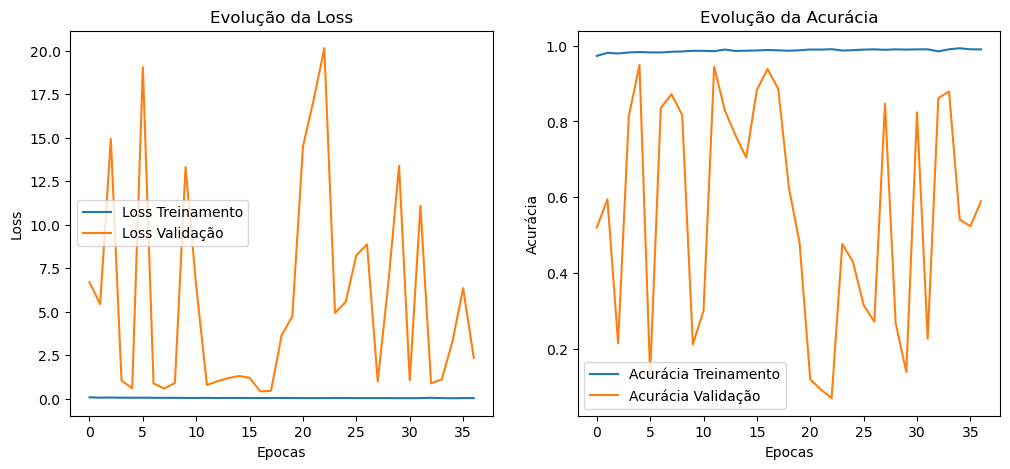


Para visualizar o treinamento em tempo real, execute no terminal:
tensorboard --logdir=logs/fit/mobileNetv2
Depois, abra no navegador: http://localhost:6006


In [8]:
# Salvar os pesos finais
weights_path = "mobileNetv2_weights_v2_224x224.weights.h5"
model.save_weights(weights_path)
model.save('mobileNetv2_model_v2_224x224.keras')
print(f"Pesos treinados salvos em: {weights_path}")

# Plotar evolução do treinamento
plot_training(history)

# Exibir instruções para visualizar o TensorBoard
print("\nPara visualizar o treinamento em tempo real, execute no terminal:")
print("tensorboard --logdir=logs/fit/mobileNetv2")
print("Depois, abra no navegador: http://localhost:6006")

475/475 [==============================] - 37s 70ms/step
Classification Report:
              precision    recall  f1-score   support

         CIN       0.69      0.95      0.80     10015
         MSI       0.65      0.19      0.29      5162

    accuracy                           0.69     15177
   macro avg       0.67      0.57      0.55     15177
weighted avg       0.68      0.69      0.63     15177

Accuracy: 0.6889
Precision: 0.6773
Recall: 0.6889
F1-Score: 0.6277


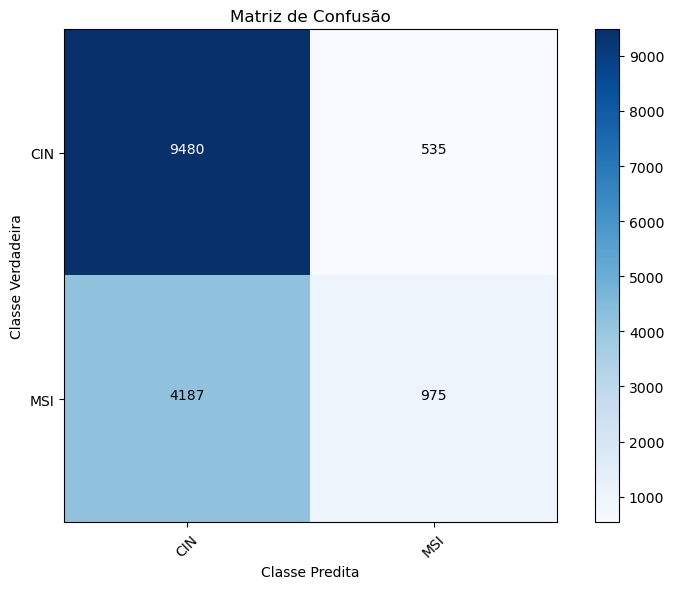

In [9]:
class_indices = test_generator.class_indices  # Índices das classes
class_labels = list(class_indices.keys())  # Nomes das classes

# Avaliação no conjunto de teste
y_true = test_generator.classes  # Classes verdadeiras
y_pred_probs = model.predict(test_generator)  # Probabilidades preditas
y_pred = np.argmax(y_pred_probs, axis=1)  # Classes preditas

# Calcular métricas
calculate_metrics(y_true, y_pred, class_labels)

# Plotar matriz de confusão
plot_confusion_matrix(y_true, y_pred, class_labels)